   Square Footage  Number of Bedrooms  Number of Bathrooms  House Age  \
0             800                   2                    1         10   
1             850                   2                    1          8   
2             900                   2                    2         12   
3             950                   3                    2          5   
4            1000                   3                    2          7   

   Distance to City Centre  Price(lakhs)  
0                        2            50  
1                        3            55  
2                        1            60  
3                        4            65  
4                        3            70  
Square Footage             0
Number of Bedrooms         0
Number of Bathrooms        0
House Age                  0
Distance to City Centre    0
Price(lakhs)               0
dtype: int64

Linear Regression Performance:
Mean Absolute Error: 0.5104831031639657
Root Mean Squared Error: 0.5669136166583534


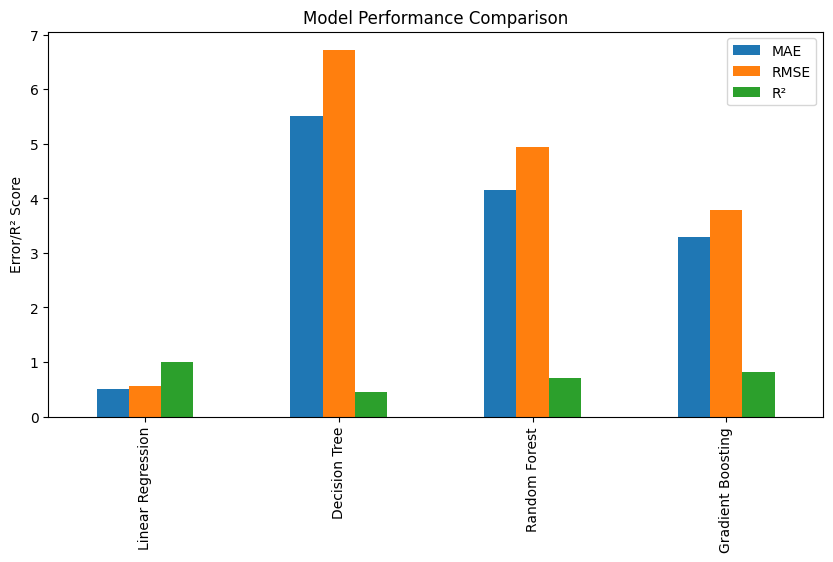


Best Performing Model: Linear Regression
Predicted House Price for [  2   2 900   1  12]: ₹60.60 lakhs
Actual House Price for [  2   2 900   1  12]: ₹ 60 lakhs (for comparison)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "house_price_data.csv"  # Change this to the actual path
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Select features and target variable
X = df[['Number of Bedrooms', 'Number of Bathrooms', 'Square Footage', 'Distance to City Centre', 'House Age']]  # Ensure correct column names
y = df['Price(lakhs)']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared Score: {r2}")

# Convert results into DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)

# Plot model comparison
results_df.plot(kind="bar", figsize=(10, 5))
plt.title("Model Performance Comparison")
plt.ylabel("Error/R² Score")
plt.show()

# Select the best-performing model based on R² Score
best_model_name = max(results, key=lambda k: results[k]["R²"])
best_model = models[best_model_name]

# Example: Predict house price for a new input using the best model
new_house = np.array([[2, 2, 900, 1, 12]])  # Example: 2 bedrooms, 2 bathrooms, 900 sqft, 1 km from city centre, 12 years old
predicted_price = best_model.predict(new_house)

print(f"\nBest Performing Model: {best_model_name}")
print(f"Predicted House Price for {new_house[0]}: ₹{predicted_price[0]:,.2f} lakhs")
print(f"Actual House Price for {new_house[0]}: ₹ 60 lakhs (for comparison)")
